In [49]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing  
import warnings # For handling error messages.
from scipy.stats import normaltest

In [4]:
# import cleaned credit card "test" dataset csv     cc_classify_out_test.csv    cc_classify_out_train.csv
cc_classify_test_EDA = pd.read_csv('C:\\Users\\\Robert\\.spyder-py3\\raw_data\\cc_classify_out_train.csv')
#
df = cc_classify_test_EDA

In [5]:
# view imported dataset
df.head(10)

,Unnamed: 0,ID,Customer_ID,Month,Name,SSN,Occupation,Age,fn_Age,Annual_Income,...,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,80.415295,High_spent_Small_value_payments,0,1,1,0,0,312.494089,Good,3
1,4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,41.420153,High_spent_Medium_value_payments,0,1,0,1,0,341.489231,Good,3
2,6,0x1608,CUS_0xd40,July,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,178.344067,Low_spent_Small_value_payments,1,0,1,0,0,244.565317,Good,3
3,7,0x1609,CUS_0xd40,August,NaN,#F%$D@*&8,Scientist,23,23.0,19114.12,...,24.785217,High_spent_Medium_value_payments,0,1,0,1,0,358.124168,Standard,2
4,9,0x160f,CUS_0x21b1,February,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,40.391238,High_spent_Large_value_payments,0,1,0,0,1,484.591214,Good,3
5,12,0x1612,CUS_0x21b1,May,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,130.115420,Low_spent_Small_value_payments,1,0,1,0,0,444.867032,Good,3
6,13,0x1613,CUS_0x21b1,June,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,43.477190,High_spent_Large_value_payments,0,1,0,0,1,481.505262,Good,3
7,15,0x1615,CUS_0x21b1,August,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,218.904344,Low_spent_Small_value_payments,1,0,1,0,0,356.078109,Good,3
8,16,0x161a,CUS_0x2dbc,January,Langep,486-85-3974,_______,34,34.0,143162.64,...,168.413703,NaN,0,0,0,0,0,1043.315978,Good,3
9,17,0x161b,CUS_0x2dbc,February,NaN,486-85-3974,Engineer,34,34.0,143162.64,...,232.860384,High_spent_Small_value_payments,0,1,1,0,0,998.869297,Good,3


In [6]:
# drop columns:  Customer_ID, Name, SSN, Age  <keeping ID for now>
df.drop([ 'Customer_ID', 'Name', 'SSN', 'Age'], inplace=True, axis=1)

In [33]:
# rename column name fn_Age to Age
df.rename(columns={'fn_Age': 'Age'}, inplace=True)
# rename column name fn_IRate to Interest_Rate
df.rename(columns={'fn_IRate': 'Interest_Rate'}, inplace=True)
# #rename column name fn_Credit_History_Age to Credit_History_Age
df.rename(columns={'fn_Credit_History_Age': 'Credit_History_Age'}, inplace=True)

C:\Users\Robert\AppData\Local\Temp\ipykernel_25372\264807000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'fn_Age': 'Age'}, inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_25372\264807000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'fn_IRate': 'Interest_Rate'}, inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_25372\264807000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [34]:
# view results of drop
df.head(15)

,Unnamed: 0,ID,Month,Occupation,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number,Mon_Bal_By_Mon_Salary
2,6,0x1608,July,Scientist,23.0,19114.12,1824.843333,3,4,3.0,...,Low_spent_Small_value_payments,1,0,1,0,0,244.565317,Good,3,0.134020
4,9,0x160f,February,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,High_spent_Large_value_payments,0,1,0,0,1,484.591214,Good,3,0.159511
5,12,0x1612,May,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,Low_spent_Small_value_payments,1,0,1,0,0,444.867032,Good,3,0.146435
6,13,0x1613,June,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,High_spent_Large_value_payments,0,1,0,0,1,481.505262,Good,3,0.158495
7,15,0x1615,August,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,Low_spent_Small_value_payments,1,0,1,0,0,356.078109,Good,3,0.117209
9,17,0x161b,February,Engineer,34.0,143162.64,12187.220000,1,5,8.0,...,High_spent_Small_value_payments,0,1,1,0,0,998.869297,Good,3,0.081960
11,20,0x161e,May,_______,34.0,143162.64,12187.220000,1,5,8.0,...,Low_spent_Large_value_payments,1,0,0,0,1,810.782153,Good,3,0.066527
12,21,0x161f,June,Engineer,34.0,143162.64,12187.220000,1,5,8.0,...,High_spent_Medium_value_payments,0,1,0,1,0,963.921581,Good,3,0.079093
13,22,0x1620,July,Engineer,34.0,143162.64,12187.220000,1,5,8.0,...,High_spent_Small_value_payments,0,1,1,0,0,968.555517,Standard,2,0.079473
14,23,0x1621,August,Engineer,34.0,143162.64,12187.220000,1,5,8.0,...,High_spent_Small_value_payments,0,1,1,0,0,895.494583,Standard,2,0.073478


In [35]:
# view `select_dtypes` method to select columns of dtype 'object'
df.select_dtypes(include=['object'])

,ID,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
2,0x1608,July,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,0x160f,February,Teacher,Credit-Builder Loan,Good,No,High_spent_Large_value_payments,Good
5,0x1612,May,Teacher,Credit-Builder Loan,Good,No,Low_spent_Small_value_payments,Good
6,0x1613,June,Teacher,Credit-Builder Loan,Good,No,High_spent_Large_value_payments,Good
7,0x1615,August,Teacher,Credit-Builder Loan,Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...,...,...,...
75065,0x25fda,January,Architect,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",Bad,Yes,High_spent_Large_value_payments,Poor
75066,0x25fdb,February,Architect,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",Bad,Yes,Low_spent_Small_value_payments,Poor
75067,0x25fdc,March,Architect,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",Bad,Yes,Low_spent_Small_value_payments,Poor
75071,0x25fe1,August,Architect,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",Bad,Yes,High_spent_Large_value_payments,Standard


In [36]:
#Use cc_classify_data's `select_dtypes` method to select columns of dtype 'int64','float64'
df.select_dtypes(include=['int64','float64'])

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Delay_from_due_date,...,Total_EMI_per_month,Amount_invested_monthly,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score_Number,Mon_Bal_By_Mon_Salary
2,6,23.0,19114.12,1824.843333,3,4,3.00,4.0,8.0,3,...,49.574949,178.344067,1,0,1,0,0,244.565317,3,0.134020
4,9,28.0,34847.84,3037.986667,2,4,6.00,1.0,1.0,7,...,18.816215,40.391238,0,1,0,0,1,484.591214,3,0.159511
5,12,28.0,34847.84,3037.986667,2,4,6.00,1.0,1.0,3,...,18.816215,130.115420,1,0,1,0,0,444.867032,3,0.146435
6,13,28.0,34847.84,3037.986667,2,4,6.00,1.0,0.0,3,...,18.816215,43.477190,0,1,0,0,1,481.505262,3,0.158495
7,15,28.0,34847.84,3037.986667,2,4,6.00,1.0,4.0,3,...,18.816215,218.904344,1,0,1,0,0,356.078109,3,0.117209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75065,99984,28.0,20002.88,1929.906667,10,8,29.00,5.0,26.0,35,...,60.964772,43.370670,0,1,0,0,1,328.655224,1,0.170296
75066,99985,28.0,20002.88,1929.906667,10,8,29.00,5.0,25.0,33,...,12112.000000,148.275233,1,0,1,0,0,273.750662,1,0.141847
75067,99986,28.0,20002.88,1929.906667,10,8,29.00,5.0,25.0,33,...,60.964772,76.282793,1,0,1,0,0,345.743101,1,0.179150
75071,99991,29.0,20002.88,1929.906667,10,8,29.00,5.0,25.0,33,...,60.964772,34.662906,0,1,0,0,1,337.362988,2,0.174808


In [8]:
# view output of sample of rows x columns
df.info

<bound method DataFrame.info of        Unnamed: 0       ID     Month Occupation  fn_Age  Annual_Income  \
0               0   0x1602   January  Scientist    23.0       19114.12   
1               4   0x1606       May  Scientist    23.0       19114.12   
2               6   0x1608      July  Scientist    23.0       19114.12   
3               7   0x1609    August  Scientist    23.0       19114.12   
4               9   0x160f  February    Teacher    28.0       34847.84   
...           ...      ...       ...        ...     ...            ...   
75073       99994  0x25fe8     March   Mechanic    25.0       39628.99   
75074       99995  0x25fe9     April   Mechanic    25.0       39628.99   
75075       99996  0x25fea       May   Mechanic    25.0       39628.99   
75076       99997  0x25feb      June   Mechanic    25.0       39628.99   
75077       99998  0x25fec      July   Mechanic    25.0       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  fn_IRate  \
0

In [13]:
# Get counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,Credit_Mix,15200
1,Type_of_Loan,8454
2,Personal_Loan_Count,8454
3,Payday_Count,8454
4,Not_Specified_Count,8454
5,Mortgage_Count,8454
6,Home_Equity_Loan_Count,8454
7,Credit_Builder_Count,8454
8,Auto_Loan_Count,8454
9,Debt_Consolidation_Count,8454


In [14]:
# Drop null values 
df = df.dropna() 

In [15]:
# Get counts of null values after dropping null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [37]:
# view data types of the columns
df.dtypes

Unnamed: 0                    int64
ID                           object
Month                        object
Occupation                   object
Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate               float64
Num_of_Loan                 float64
Num_of_Delayed_Payment      float64
Delay_from_due_date           int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_History_Age          float64
Type_of_Loan                 object
Loan_Type_Total_Count         int64
Auto_Loan_Count             float64
Credit_Builder_Count        float64
Debt_Consolidation_Count    float64
Home_Equity_Loan_Count      float64
Mortgage_Count              float64
Not_Specified_Count         float64
Payday_Count                float64
Personal_Loan_Count         float64
Credit_Mix                   object
Outstanding_Debt            

In [38]:
# Call the .corr() method on the credit card test dataset dataset to view matrix of correlations
df.corr()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Delay_from_due_date,...,Total_EMI_per_month,Amount_invested_monthly,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score_Number,Mon_Bal_By_Mon_Salary
Unnamed: 0,1.000000,0.000405,0.006401,-0.003847,0.014488,-0.006666,0.010366,-0.008729,0.008072,0.005247,...,0.009388,0.004353,0.005495,-0.005495,-0.005238,0.000762,0.005041,-0.003287,-0.000893,-0.000376
Age,0.000405,1.000000,0.006537,0.095729,-0.192077,-0.003723,-0.215249,-0.191602,0.001314,-0.171818,...,0.004962,0.004528,-0.021903,0.021903,-0.032060,0.010418,0.024638,0.108955,0.162795,-0.049828
Annual_Income,0.006401,0.006537,1.000000,0.027789,-0.005451,0.007503,-0.009489,-0.001336,-0.001934,-0.005524,...,-0.008809,-0.001951,-0.006019,0.006019,-0.017764,0.003346,0.016275,0.018167,0.005382,-0.013045
Monthly_Inhand_Salary,-0.003847,0.095729,0.027789,1.000000,-0.288211,-0.005635,-0.303768,-0.235116,0.003084,-0.249938,...,0.008100,0.052441,-0.240566,0.240566,-0.259963,0.105500,0.177058,0.632309,0.214827,-0.628043
Num_Bank_Accounts,0.014488,-0.192077,-0.005451,-0.288211,1.000000,0.007750,0.576491,0.449068,0.010509,0.558084,...,0.003176,-0.017862,0.069555,-0.069555,0.073790,-0.028808,-0.051487,-0.285154,-0.389607,0.166855
Num_Credit_Card,-0.006666,-0.003723,0.007503,-0.005635,0.007750,1.000000,0.004394,0.010778,0.003272,0.009130,...,0.001032,0.001426,0.001519,-0.001519,0.001259,-0.003366,0.002229,-0.004834,-0.007799,0.001475
Interest_Rate,0.010366,-0.215249,-0.009489,-0.303768,0.576491,0.004394,1.000000,0.510806,0.014502,0.580832,...,0.000090,-0.015596,0.074204,-0.074204,0.082965,-0.028272,-0.062341,-0.305126,-0.485712,0.188917
Num_of_Loan,-0.008729,-0.191602,-0.001336,-0.235116,0.449068,0.010778,0.510806,1.000000,0.008523,0.469891,...,0.000085,-0.019346,0.056868,-0.056868,0.071737,-0.030280,-0.047598,-0.388375,-0.320128,0.065327
Num_of_Delayed_Payment,0.008072,0.001314,-0.001934,0.003084,0.010509,0.003272,0.014502,0.008523,1.000000,0.011321,...,0.001537,-0.001943,0.000322,-0.000322,0.003173,-0.004957,0.001805,-0.002776,-0.007345,-0.008761
Delay_from_due_date,0.005247,-0.171818,-0.005524,-0.249938,0.558084,0.009130,0.580832,0.469891,0.011321,1.000000,...,-0.003034,-0.009221,0.061231,-0.061231,0.069849,-0.026411,-0.049666,-0.265408,-0.427033,0.139480


In [18]:
#                    Annual_Income Monthly_Inhand_Salary  Monthly_Balance      Loan_Type_Total_Count
df['Loan_Type_Total_Count'].describe() # Occupation fn_Age Name Num_of_Delayed_Payment     Credit_Score_Number

count    38890.000000
mean         3.978195
std          2.217189
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: Loan_Type_Total_Count, dtype: float64

In [19]:
#                                                    Credit_Score_Number
df['Loan_Type_Total_Count'].value_counts()

3    6964
2    6866
4    6830
1    4910
6    3535
7    3344
5    3323
9    1681
8    1437
Name: Loan_Type_Total_Count, dtype: int64

In [20]:
# view missing data
# Type_of_Loan has 4289 recs with "NA"; filter out and re-run
df.isna().sum()

Unnamed: 0                  0
ID                          0
Month                       0
Occupation                  0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
fn_IRate                    0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
fn_Credit_History_Age       0
Type_of_Loan                0
Loan_Type_Total_Count       0
Auto_Loan_Count             0
Credit_Builder_Count        0
Debt_Consolidation_Count    0
Home_Equity_Loan_Count      0
Mortgage_Count              0
Not_Specified_Count         0
Payday_Count                0
Personal_Loan_Count         0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Is_Low_Spe

In [14]:
# filter for rows with "NA"
df_na = df[df['Type_of_Loan'] == 'NA']
print(df_na)          # returns Empty df  [0 rows x 39 columns]

Empty DataFrame
Columns: [Unnamed: 0, ID, Month, Occupation, fn_Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, fn_IRate, Num_of_Loan, Num_of_Delayed_Payment, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, fn_Credit_History_Age, Type_of_Loan, Loan_Type_Total_Count, Auto_Loan_Count, Credit_Builder_Count, Debt_Consolidation_Count, Home_Equity_Loan_Count, Mortgage_Count, Not_Specified_Count, Payday_Count, Personal_Loan_Count, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Is_Low_Spent, Is_High_Spent, Is_Small_PMT, Is_Medium_PMT, Is_Large_PMT, Monthly_Balance, Credit_Score, Credit_Score_Number]
Index: []

[0 rows x 41 columns]


In [15]:
# filter out rows with "NA"
df = df[df['Type_of_Loan'] != 'NA']

In [16]:
df_na.head(50)

,Unnamed: 0,ID,Month,Occupation,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,...,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number


In [41]:
# re-view missing data after 4289 recs of Type_of_Loan with "NA" filtered out
df.isna().sum()

Unnamed: 0                  0
ID                          0
Month                       0
Occupation                  0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_History_Age          0
Type_of_Loan                0
Loan_Type_Total_Count       0
Auto_Loan_Count             0
Credit_Builder_Count        0
Debt_Consolidation_Count    0
Home_Equity_Loan_Count      0
Mortgage_Count              0
Not_Specified_Count         0
Payday_Count                0
Personal_Loan_Count         0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Is_Low_Spe

In [22]:
df.head(50)

,Unnamed: 0,ID,Month,Occupation,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,...,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number
2,6,0x1608,July,Scientist,23.0,19114.120,1824.843333,3,4,3.0,...,178.344067,Low_spent_Small_value_payments,1,0,1,0,0,244.565317,Good,3
4,9,0x160f,February,Teacher,28.0,34847.840,3037.986667,2,4,6.0,...,40.391238,High_spent_Large_value_payments,0,1,0,0,1,484.591214,Good,3
5,12,0x1612,May,Teacher,28.0,34847.840,3037.986667,2,4,6.0,...,130.115420,Low_spent_Small_value_payments,1,0,1,0,0,444.867032,Good,3
6,13,0x1613,June,Teacher,28.0,34847.840,3037.986667,2,4,6.0,...,43.477190,High_spent_Large_value_payments,0,1,0,0,1,481.505262,Good,3
7,15,0x1615,August,Teacher,28.0,34847.840,3037.986667,2,4,6.0,...,218.904344,Low_spent_Small_value_payments,1,0,1,0,0,356.078109,Good,3
9,17,0x161b,February,Engineer,34.0,143162.640,12187.220000,1,5,8.0,...,232.860384,High_spent_Small_value_payments,0,1,1,0,0,998.869297,Good,3
11,20,0x161e,May,_______,34.0,143162.640,12187.220000,1,5,8.0,...,430.947528,Low_spent_Large_value_payments,1,0,0,0,1,810.782153,Good,3
12,21,0x161f,June,Engineer,34.0,143162.640,12187.220000,1,5,8.0,...,257.808099,High_spent_Medium_value_payments,0,1,0,1,0,963.921581,Good,3
13,22,0x1620,July,Engineer,34.0,143162.640,12187.220000,1,5,8.0,...,263.174163,High_spent_Small_value_payments,0,1,1,0,0,968.555517,Standard,2
14,23,0x1621,August,Engineer,34.0,143162.640,12187.220000,1,5,8.0,...,10000.000000,High_spent_Small_value_payments,0,1,1,0,0,895.494583,Standard,2


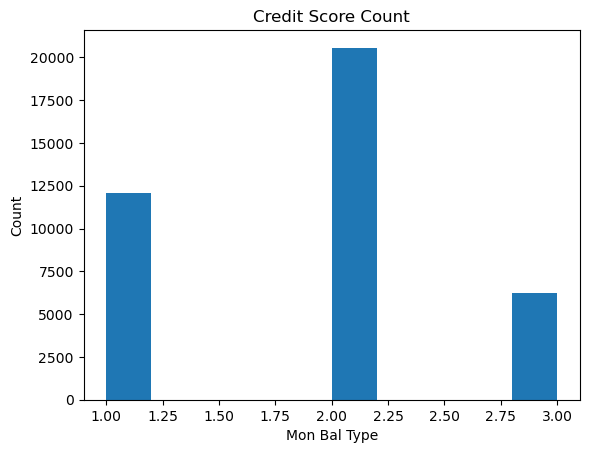

In [23]:
# Create histogram       Monthly_Balance   Loan Type Total Count
plt.hist(df['Credit_Score_Number'])   
# Add a title 
plt.title("Credit Score Count")   
# Add X and Y axis labels 
plt.xlabel("Mon Bal Type") 
plt.ylabel("Count")   
# Show graphic 
plt.show()

In [20]:
#  Tested:       Annual_Income               Loan_Type_Total_Count       Credit_Score_Number    Monthly_Balance
from scipy.stats import normaltest
data = list(df['Annual_Income'])

# perform normality test
statistic, p_value = normaltest(data)
print(statistic, p_value)
# print results
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

128880.69631034698 0.0
The data is not normally distributed.


In [42]:
# Filter the dataframe for rows where Credit_Score')['Annual_Income are different,
print(df.groupby('Credit_Score')['Credit_History_Age'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std  min    max
Credit_Score                                           
Good           6258  283.311122   75.934139  6.0  404.0
Poor          12066  164.990220   83.915847  2.0  404.0
Standard      20566  220.135904  100.119190  2.0  404.0


In [24]:
# Filter the dataframe for rows where Credit_Score')['Annual_Income are different,
print(df.groupby('Credit_Score')['Annual_Income'].agg(['count', 'mean', 'std', 'min', 'max']))

              count           mean           std      min         max
Credit_Score                                                         
Good           6258  178298.359822  1.409499e+06  7261.91  24198062.0
Poor          12066  160571.225888  1.417956e+06  7005.93  23912939.0
Standard      20566  184948.757235  1.467858e+06  7006.52  24160009.0


In [22]:
#group that by 'state' and perform `value_counts` on the 'Region'
print(df.groupby('Credit_Score')['Annual_Income'].value_counts())

Credit_Score  Annual_Income
Good          1.356677e+04     8
              1.420886e+04     8
              1.560425e+04     8
              2.120682e+04     8
              3.201994e+04     8
                              ..
Standard      2.409698e+07     1
              2.410537e+07     1
              2.416001e+07     1
              2.417715e+07     1
              2.418881e+07     1
Name: Annual_Income, Length: 19820, dtype: int64


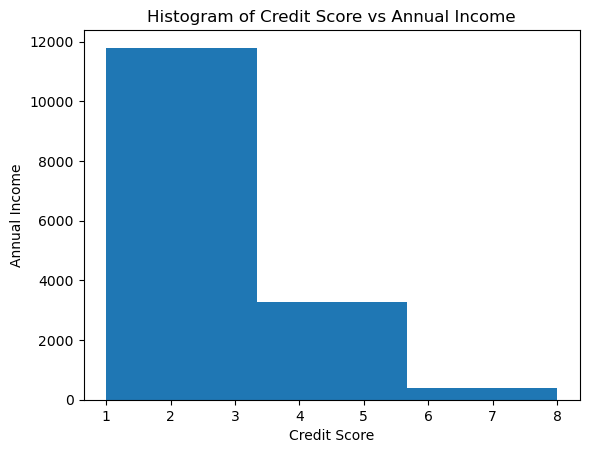

In [25]:
plt.hist(df.groupby('Credit_Score_Number')['Annual_Income'].value_counts(), bins=3)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('Histogram of Credit Score vs Annual Income')
plt.show()

In [26]:
np.median(df['Num_Bank_Accounts'])

# one time clean up
for index, row in df.iterrows():
    if row['Num_Bank_Accounts'] >= 11:
        df.loc[index,'Num_Bank_Accounts'] = np.median(df['Num_Bank_Accounts'])   

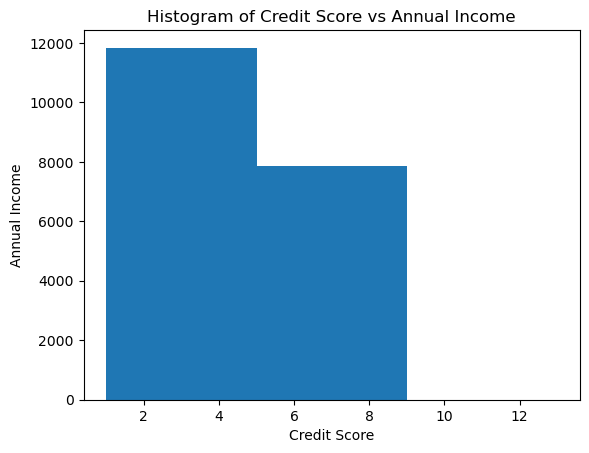

In [27]:
#
plt.hist(df.groupby('Credit_Score_Number')['Monthly_Inhand_Salary'].value_counts(), bins=3)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('Histogram of Credit Score vs Annual Income')
plt.show()

In [27]:
# Aggregate the data for Credit_Score by Monthly_Balance 
# This seems counter intuitive: Good credit score paired with higher Monthly_Balance
print(df.groupby('Credit_Score')['Monthly_Balance'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std   min          max
Credit_Score                                                  
Good           6258  445.180757  239.693291  0.01  1443.569276
Poor          12066  330.090150  160.206879  0.01  1468.313963
Standard      20566  385.821443  199.595777  0.01  1552.946094


In [28]:
# Aggregate the data for rows Credit_Score by Monthly_Inhand_Salary
print(df.groupby('Credit_Score')['Monthly_Inhand_Salary'].agg(['count', 'mean', 'std', 'min', 'max']))

              count         mean          std         min           max
Credit_Score                                                           
Good           6258  5374.424403  3666.437561  393.159167  15136.696667
Poor          12066  3304.369865  2576.789586  319.556250  15167.180000
Standard      20566  4145.492076  3094.183273  303.645417  15204.633333


In [29]:
# Create new feature Mon_Bal_By_Mon_Salary' = ( 'Monthly_Balance'/df'Monthly_Inhand_Salary )
df['Mon_Bal_By_Mon_Salary'] = df['Monthly_Balance']/df['Monthly_Inhand_Salary']

# Aggregate the data for rows Credit_Score by Monthly_Inhand_Salary
print(df.groupby('Credit_Score')['Mon_Bal_By_Mon_Salary'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std           min       max
Credit_Score                                                   
Good           6258  0.115945  0.072657  6.777367e-07  0.706931
Poor          12066  0.158614  0.118571  6.615861e-07  0.852991
Standard      20566  0.139894  0.098222  6.606461e-07  0.861514


C:\Users\Robert\AppData\Local\Temp\ipykernel_25372\2197705594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mon_Bal_By_Mon_Salary'] = df['Monthly_Balance']/df['Monthly_Inhand_Salary']


In [43]:
# Aggregate the data for rows Credit_Score by fn_IRate
# The differences are dramatic: Good credit = 7.8, Standard = 13.78, Poor=20.86
print(df.groupby('Credit_Score')['Interest_Rate'].agg(['count', 'mean', 'std', 'min', 'max']))

              count       mean       std  min   max
Credit_Score                                       
Good           6258   7.934062  5.118325  1.0  34.0
Poor          12066  20.628589  8.509727  1.0  34.0
Standard      20566  14.207537  7.794712  1.0  34.0


In [114]:
# Aggregate the data for rows Credit_Score by Annual_Income
print(df.groupby('Credit_Score')['Annual_Income'].agg(['count', 'mean', 'std', 'min', 'max']))

              count           mean           std      min         max
Credit_Score                                                         
Good          13233  190595.480190  1.451329e+06  7189.54  24198062.0
Poor          21730  157702.551627  1.386941e+06  7005.93  23912939.0
Standard      40115  189733.042609  1.495577e+06  7006.52  24188807.0


In [44]:
# Aggregate the data for rows Credit_Score by Credit_Utilization_Ratio
print(df.groupby('Credit_Score')['Credit_Utilization_Ratio'].agg(['count', 'mean', 'std', 'min', 'max']))
                    Credit_Utilization_Ratio                 

              count       mean       std        min        max
Credit_Score                                                  
Good           6258  32.582331  5.130783  20.880082  48.176599
Poor          12066  31.980051  5.043068  20.985606  46.230683
Standard      20566  32.212623  5.052935  20.830946  49.564519


In [116]:
# Aggregate the data for rows Credit_Score by Num_Credit_Card
print(df.groupby('Credit_Score')['Num_Credit_Card'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  4.199123  1.812398    0   10
Poor          21730  6.609526  1.968805    1   16
Standard      40115  5.426025  1.847661    0   18


In [117]:
# Aggregate the data for rows Credit_Score by Num_Bank_Accounts
print(df.groupby('Credit_Score')['Num_Bank_Accounts'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  3.484093  2.220584   -1   10
Poor          21730  6.518776  2.492853   -1   10
Standard      40115  5.385018  2.354106   -1   10


In [118]:
# Aggregate the data for rows Credit_Score by Loan_Type_Total_Count
# the differences here are dramatic:  Poor has much larger mean for loan count
print(df.groupby('Credit_Score')['Loan_Type_Total_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  2.208267  1.649814    0    9
Poor          21730  4.747354  2.435310    0    9
Standard      40115  3.320977  2.375803    0    9


In [122]:
# Aggregate the data for rows Credit_Score by Amount_invested_monthly
# the differences here are dramatic:  Good has much larger mean
print(df.groupby('Credit_Score')['Amount_invested_monthly'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std  min          max
Credit_Score                                                 
Good          13233  238.224206  257.065630  0.0  1903.080048
Poor          21730  151.767878  148.248602  0.0  1944.520747
Standard      40115  184.053256  190.366552  0.0  1977.326102


In [123]:
# Aggregate the data for rows Credit_Score by Outstanding_Debt
# the differences here are dramatic: Good has much smaller mean
print(df.groupby('Credit_Score')['Outstanding_Debt'].agg(['count', 'mean', 'std', 'min', 'max']))

              count         mean          std   min      max
Credit_Score                                                
Good          13233   802.255249   615.150473  0.23  4998.07
Poor          21730  2082.167128  1144.771710  0.54  4997.10
Standard      40115  1278.209192  1133.193275  0.23  4998.07


In [57]:
# Aggregate the data for rows Credit_Score by Not_Specified_Count
# the differences here are dramatic: Good has much smaller mean
print(df.groupby('Credit_Score')['Not_Specified_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good           6258  0.318792  0.543315  0.0  4.0
Poor          12066  0.547406  0.729883  0.0  4.0
Standard      20566  0.427745  0.665503  0.0  4.0


In [58]:
# Aggregate the data for rows Credit_Score by Auto_Loan_Count
# the differences here are dramatic: Good has much smaller mean
print(df.groupby('Credit_Score')['Auto_Loan_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good           6258  0.283957  0.528916  0.0  3.0
Poor          12066  0.529836  0.716496  0.0  4.0
Standard      20566  0.403141  0.649919  0.0  4.0


In [29]:
# Aggregate the data for rows Credit_Score by Total_EMI_per_month
# Not much difference among Good, Poor, Standard, Equated Monthly Installment
print(df.groupby('Credit_Score')['Total_EMI_per_month'].agg(['count', 'mean', 'std', 'min', 'max']))
#     Total Equated Monthly Installment (EMI) Per Month

              count         mean          std  min      max
Credit_Score                                               
Good          13233  1476.562484  8450.021653  0.0  82236.0
Poor          21730  1376.620418  8199.564539  0.0  81971.0
Standard      40115  1373.291245  8220.851644  0.0  82193.0


In [30]:
# Aggregate the data for rows Credit_Score by Pay day loans
# Large difference among Good and Poor when looking at Pay day loans
print(df.groupby('Credit_Score')['Payday_Count'].agg(['count', 'mean', 'std', 'min', 'max']))
#                Payday Loan Count

              count      mean       std  min  max
Credit_Score                                     
Good          10716  0.313550  0.550101  0.0  4.0
Poor          20742  0.576994  0.767969  0.0  5.0
Standard      35166  0.431212  0.664706  0.0  5.0


In [31]:
# Aggregate the data for rows Credit_Score by Mortgage Loans
# not sure how to interpret this one
print(df.groupby('Credit_Score')['Mortgage_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          10716  0.310844  0.539402  0.0  3.0
Poor          20742  0.549706  0.728790  0.0  5.0
Standard      35166  0.418785  0.652758  0.0  5.0


In [45]:
# Aggregate the data for rows Credit_Score by fn_Credit_History_Age
# Large difference in the number of mean months between Good and Poor credit scores
print(df.groupby('Credit_Score')['Credit_History_Age'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std  min    max
Credit_Score                                           
Good           6258  283.311122   75.934139  6.0  404.0
Poor          12066  164.990220   83.915847  2.0  404.0
Standard      20566  220.135904  100.119190  2.0  404.0


In [56]:
# Aggregate the data for rows Credit_Score by Debt_Consolidation_Count
# Large difference in the number of mean months between Good and Poor credit scores
print(df.groupby('Credit_Score')['Debt_Consolidation_Count'].agg(['count', 'mean', 'std', 'min', 'max']))       

              count      mean       std  min  max
Credit_Score                                     
Good           6258  0.290348  0.518699  0.0  3.0
Poor          12066  0.544091  0.738220  0.0  4.0
Standard      20566  0.409705  0.644558  0.0  5.0


In [59]:
# Aggregate the data for rows Credit_Score by Num_Credit_Inquiries
# Large difference between Good and Poor credit scores
print(df.groupby('Credit_Score')['Num_Credit_Inquiries'].agg(['count', 'mean', 'std', 'min', 'max'])) 

              count      mean       std  min    max
Credit_Score                                       
Good           6258  3.669863  3.545385  0.0  22.01
Poor          12066  8.602178  3.951250  0.0  22.01
Standard      20566  5.843453  4.220495  0.0  45.00


In [60]:
# Aggregate the data for rows Credit_Score by Changed_Credit_Limit
# Large difference between Good and Poor credit scores
print(df.groupby('Credit_Score')['Changed_Credit_Limit'].agg(['count', 'mean', 'std', 'min', 'max']))    

              count       mean       std   min    max
Credit_Score                                         
Good           6258   7.334995  5.126759 -6.35  32.11
Poor          12066  11.298526  7.173774 -6.44  35.82
Standard      20566  11.500504  6.944486 -6.31  36.29


In [61]:
# Aggregate the data for rows Credit_Score by Num_of_Delayed_Payment
print(df.groupby('Credit_Score')['Num_of_Delayed_Payment'].agg(['count', 'mean', 'std', 'min', 'max'])) 

              count       mean         std  min     max
Credit_Score                                           
Good           6258  26.625919  227.804058 -3.0  4360.0
Poor          12066  32.566468  222.999647 -3.0  4311.0
Standard      20566  32.289021  230.413540 -3.0  4397.0


In [62]:
# Aggregate the data for rows Credit_Score by Num_of_Loan
print(df.groupby('Credit_Score')['Num_of_Loan'].agg(['count', 'mean', 'std', 'min', 'max'])) 
        #        Number of Loans

              count      mean       std  min  max
Credit_Score                                     
Good           6258  2.687317  1.415550  1.0  9.0
Poor          12066  4.801035  2.322812  1.0  9.0
Standard      20566  3.684034  2.166557  1.0  9.0


In [33]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import pandas as pd

#load data
data = pd.read_csv("C:\\Users\\\Robert\\.spyder-py3\\raw_data\\archive\\cc_classify_decision_tree.csv")
# drop all records with NaN values
data = data.dropna()

#split data into features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#create decision tree model
model = DecisionTreeClassifier()

#train model
model.fit(X_train, y_train)

#predict using model
y_pred = model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: {}%".format(accuracy*100))
# Model accuracy: 69.10675381263617%
#print(X_train)
#print(DecisionTreeClassifier.feature_importances_)
print(y_test, y_pred)

Model accuracy: 68.23529411764706%
1977     3
10185    1
2945     1
12225    3
6572     2
        ..
4989     3
60       2
9257     3
9255     3
4765     2
Name: Credit_Score_Number, Length: 2295, dtype: int64 [3 2 1 ... 3 3 2]


In [47]:
# From dataframe script a list that returns all columns that are numeric
# Create a list to store the numeric columns
numeric_columns = []

# Iterate through each column in the dataframe
for col in df.columns:
  # Check if the column is numeric
  if df[col].dtypes in ['int64', 'float64']:
    # If it is, add it to the list
    numeric_columns.append(col)

# Print the list of numeric columns
print(numeric_columns)

['Unnamed: 0', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Loan_Type_Total_Count', 'Auto_Loan_Count', 'Credit_Builder_Count', 'Debt_Consolidation_Count', 'Home_Equity_Loan_Count', 'Mortgage_Count', 'Not_Specified_Count', 'Payday_Count', 'Personal_Loan_Count', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Is_Low_Spent', 'Is_High_Spent', 'Is_Small_PMT', 'Is_Medium_PMT', 'Is_Large_PMT', 'Monthly_Balance', 'Credit_Score_Number', 'Mon_Bal_By_Mon_Salary']


In [50]:
# For loop to check if each numeric column is normally distributed
for col in numeric_columns:
  # Use the normaltest to check for normality
  stat, p = normaltest(df[col])
  # Print the results of the test
  print(f'{col} has a p-value of {p}')
  # Check if the p-value is less than 0.05
  if p < 0.05:
    # Print the column is not normally distributed
    print(f'{col} is not normally distributed')
  else:
    # Print the column is normally distributed
    print(f'{col} is normally distributed') 

Unnamed: 0 is not normally distributed
Age is not normally distributed
Annual_Income is not normally distributed
Monthly_Inhand_Salary is not normally distributed
Num_Bank_Accounts is not normally distributed
Num_Credit_Card is not normally distributed
Interest_Rate is not normally distributed
Num_of_Loan is not normally distributed
Num_of_Delayed_Payment is not normally distributed
Delay_from_due_date is not normally distributed
Changed_Credit_Limit is not normally distributed
Num_Credit_Inquiries is not normally distributed
Credit_History_Age is not normally distributed
Loan_Type_Total_Count is not normally distributed
Auto_Loan_Count is not normally distributed
Credit_Builder_Count is not normally distributed
Debt_Consolidation_Count is not normally distributed
Home_Equity_Loan_Count is not normally distributed
Mortgage_Count is not normally distributed
Not_Specified_Count is not normally distributed
Payday_Count is not normally distributed
Personal_Loan_Count is not normally distri

In [36]:
# Set some columns to their median earlier in the process and setting all the remaining blanks to their median values
# Filling missing values with medians of the columns
df = df.fillna(df.median())

C:\Users\Robert\AppData\Local\Temp\ipykernel_19608\2817259545.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


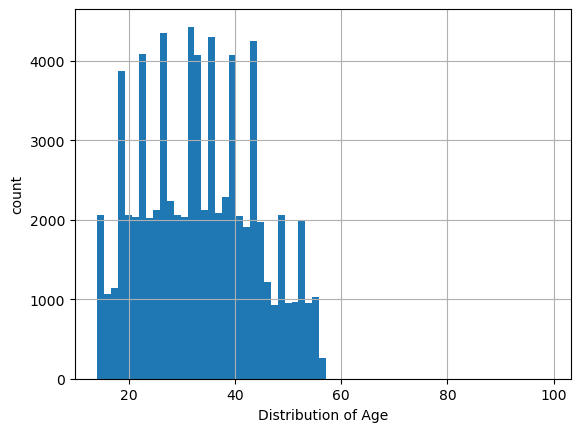

In [162]:
df.fn_Age.hist(bins=65)
plt.xlabel('Distribution of Age')
plt.ylabel('count');

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fn_Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>,
        <AxesSubplot:title={'center':'Num_Credit_Card'}>],
       [<AxesSubplot:title={'center':'fn_IRate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>],
       [<AxesSubplot:title={'center':'fn_Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Loan_Type_Total_Count'}>,
        <AxesSubplot:title={'center':'Auto_Loan_Count'}>,
        <AxesSubplot:title={'center':'Credit_Builder_Count'}>,
        <AxesSubplot:title={'center':'Debt_Consolid

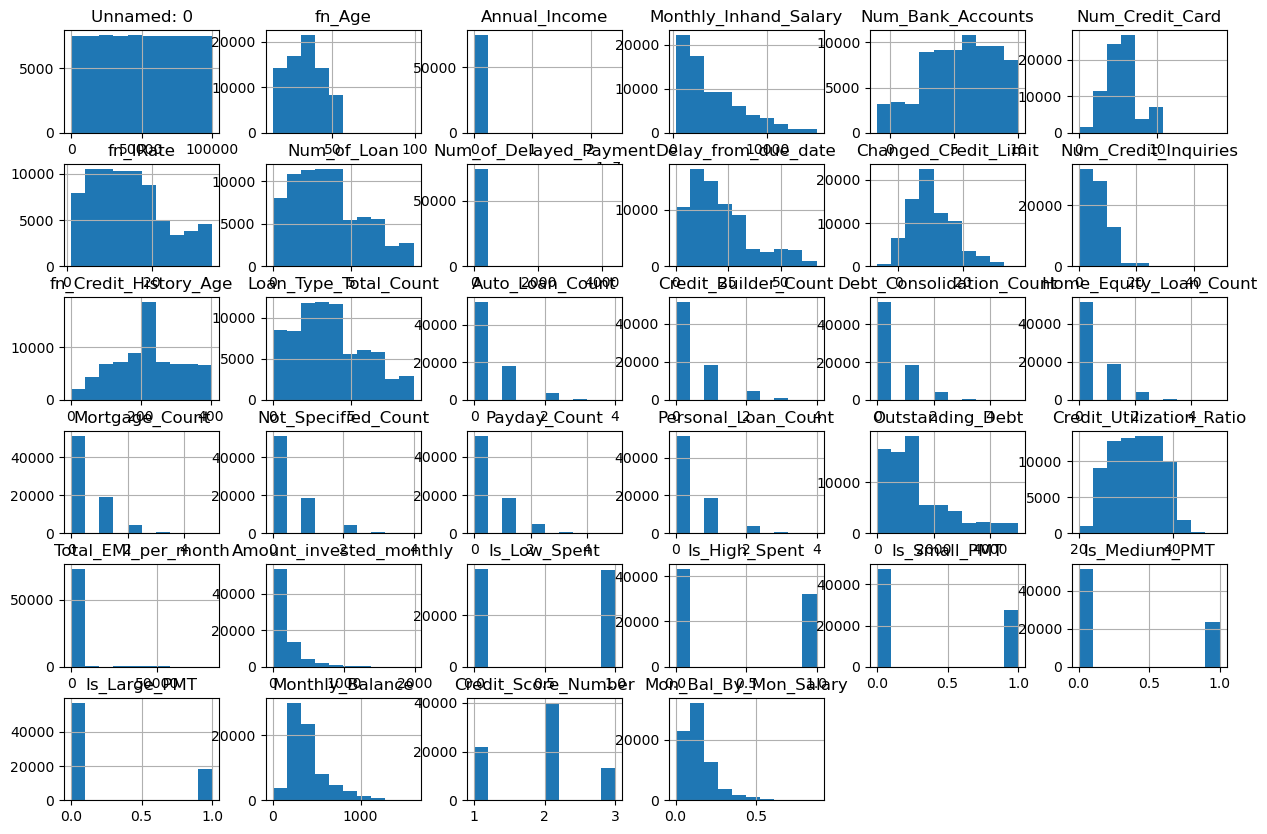

In [159]:
#
df.hist(figsize=(15,10))

In [161]:
# For loop to check numeric column's median value
for col in numeric_columns:
  # Use the normaltest to check for normality
  np_median = np.median(df[col])
  # Print the results of the test
  print(f'{col} has a median value of {np_median}')

Unnamed: 0 has a median value of 49933.0
fn_Age has a median value of 33.0
Annual_Income has a median value of 37570.83
Monthly_Inhand_Salary has a median value of 3093.745000000001
Num_Bank_Accounts has a median value of 6.0
Num_Credit_Card has a median value of 6.0
fn_IRate has a median value of 14.0
Num_of_Loan has a median value of 3.0
Num_of_Delayed_Payment has a median value of 14.0
Delay_from_due_date has a median value of 18.0
Changed_Credit_Limit has a median value of 9.41
Num_Credit_Inquiries has a median value of 6.0
fn_Credit_History_Age has a median value of 219.0
Loan_Type_Total_Count has a median value of 3.0
Auto_Loan_Count has a median value of 0.0
Credit_Builder_Count has a median value of 0.0
Debt_Consolidation_Count has a median value of 0.0
Home_Equity_Loan_Count has a median value of 0.0
Mortgage_Count has a median value of 0.0
Not_Specified_Count has a median value of 0.0
Payday_Count has a median value of 0.0
Personal_Loan_Count has a median value of 0.0
Outstan

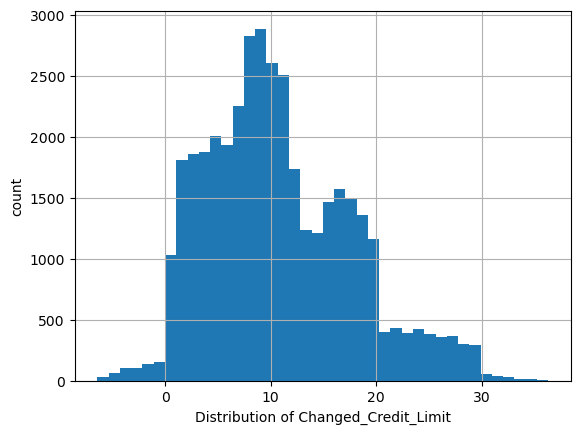

In [51]:
#Changed_Credit_Limit
df.Changed_Credit_Limit.hist(bins=40)
plt.xlabel('Distribution of Changed_Credit_Limit')
plt.ylabel('count');

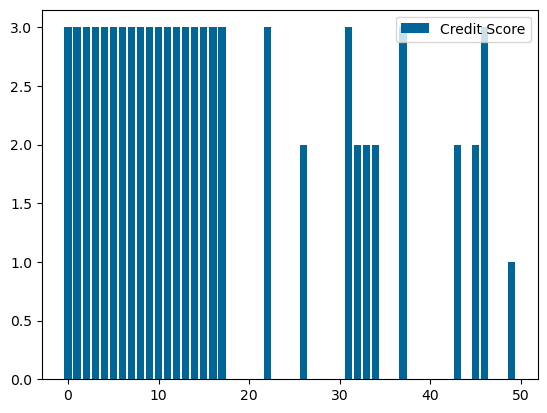

In [170]:
# Create stacked bar chart
fig, ax = plt.subplots()

# Set x-axis to the number of credit inquiries
x = df.Num_Credit_Inquiries

# Set y-axis to credit score numbers
y1 = df.Credit_Score_Number

# Create the bars
ax.bar(x, y1, color='#006699', label='Credit Score')

# Add legend
ax.legend(loc='upper right')

# Show plot
plt.show()

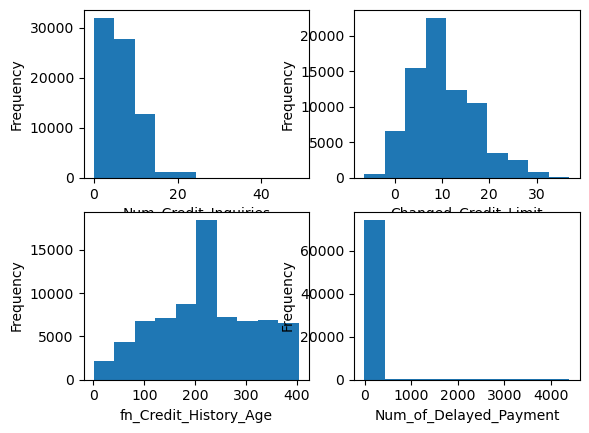

In [180]:
# create a figure with four subplots 
fig, axes = plt.subplots(2,2)

#create histogram for each variable 
df['Num_Credit_Inquiries'].plot.hist(ax=axes[0,0])
df['Changed_Credit_Limit'].plot.hist(ax=axes[0,1])
df['fn_Credit_History_Age'].plot.hist(ax=axes[1,0])
df['Num_of_Delayed_Payment'].plot.hist(ax=axes[1,1])

#add title and labels for x and y axis 
#axes[0,0].set_title("Num_Credit_Inquiries")
axes[0,0].set_xlabel("Num_Credit_Inquiries")

#axes[0,1].set_title("Changed_Credit_Limit")
axes[0,1].set_xlabel("Changed_Credit_Limit")
print("\n\n")
#axes[1,0].set_title("fn_Credit_History_Age")
axes[1,0].set_xlabel("fn_Credit_History_Age")

#axes[1,1].set_title("Num_of_Delayed_Payment")
axes[1,1].set_xlabel("Num_of_Delayed_Payment")

#show the plots
plt.show()

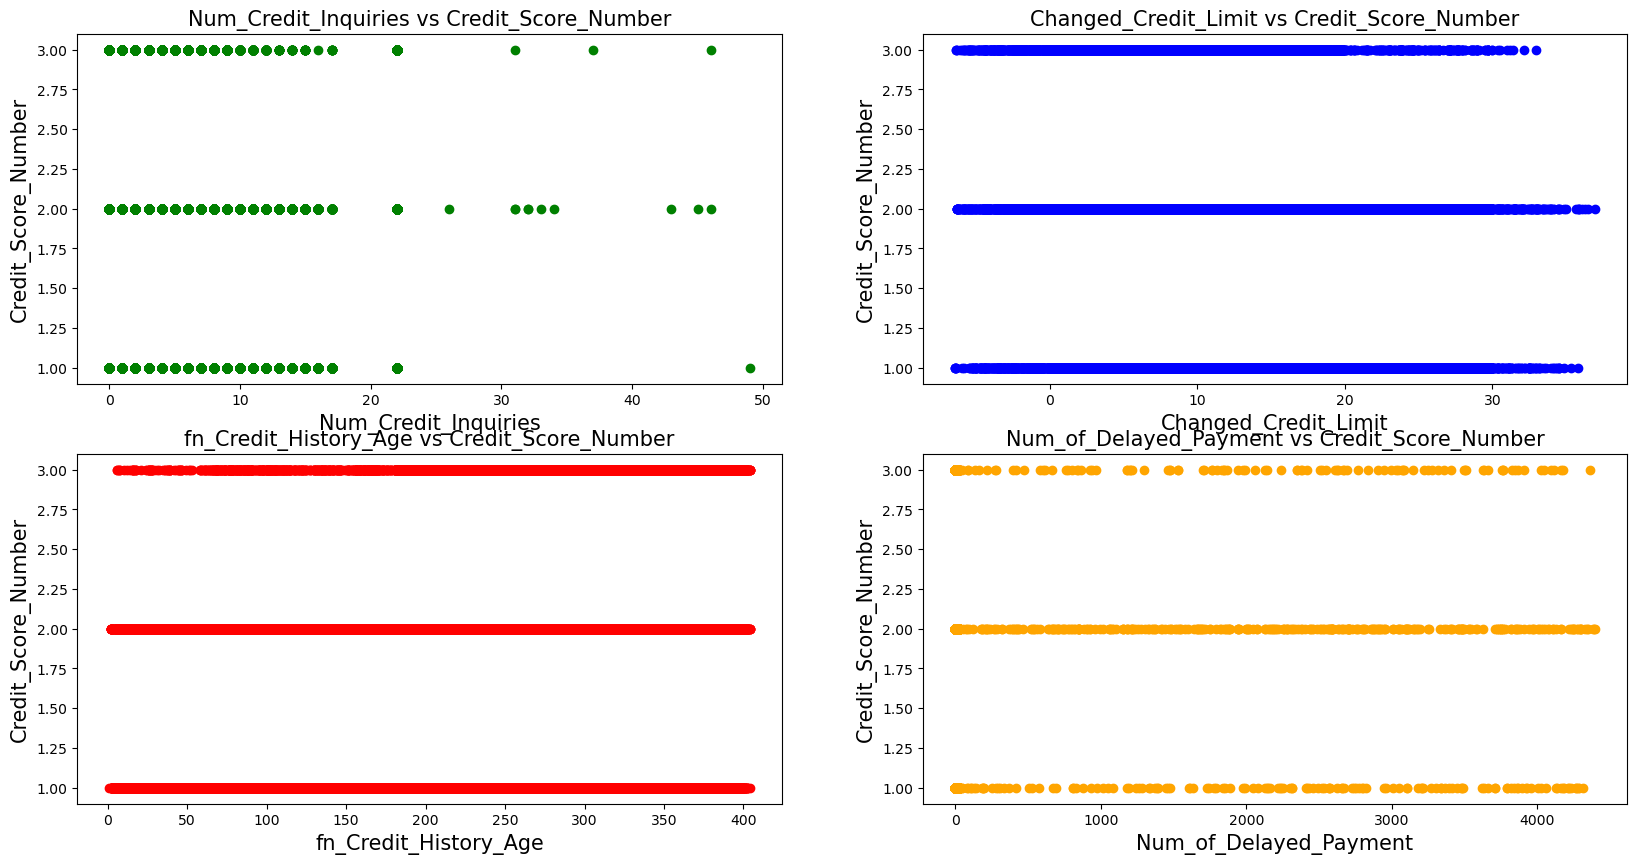

In [176]:
#creating the figure
fig = plt.figure(figsize=(20, 10))

#plotting the four charts with the four x variables and the y variable
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#plotting the first chart with variable 'Num_Credit_Inquiries' as x and 'Credit_Score_Number' as y
ax1.scatter(df['Num_Credit_Inquiries'], df['Credit_Score_Number'], color='green')
ax1.set_title('Num_Credit_Inquiries vs Credit_Score_Number', fontsize=15)
ax1.set_xlabel('Num_Credit_Inquiries', fontsize=15)
ax1.set_ylabel('Credit_Score_Number', fontsize=15)

#plotting the second chart with variable 'Changed_Credit_Limit' as x and 'Credit_Score_Number' as y
ax2.scatter(df['Changed_Credit_Limit'], df['Credit_Score_Number'], color='blue')
ax2.set_title('Changed_Credit_Limit vs Credit_Score_Number', fontsize=15)
ax2.set_xlabel('Changed_Credit_Limit', fontsize=15)
ax2.set_ylabel('Credit_Score_Number', fontsize=15)

#plotting the third chart with variable 'fn_Credit_History_Age' as x and 'Credit_Score_Number' as y
ax3.scatter(df['fn_Credit_History_Age'], df['Credit_Score_Number'], color='red')
ax3.set_title('fn_Credit_History_Age vs Credit_Score_Number', fontsize=15)
ax3.set_xlabel('fn_Credit_History_Age', fontsize=15)
ax3.set_ylabel('Credit_Score_Number', fontsize=15)

#plotting the fourth chart with variable 'Num_of_Delayed_Payment' as x and 'Credit_Score_Number' as y
ax4.scatter(df['Num_of_Delayed_Payment'], df['Credit_Score_Number'], color='orange')
ax4.set_title('Num_of_Delayed_Payment vs Credit_Score_Number', fontsize=15)
ax4.set_xlabel('Num_of_Delayed_Payment', fontsize=15)
ax4.set_ylabel('Credit_Score_Number', fontsize=15)

#showing the plot
plt.show()

In [186]:
# create a new data fram
#p_credit_payday = df[(df['Credit_Score'] == 'Poor') & (df['Payday_Count'] == 1)]

df['p_credit_payday'] = np.where((df['Credit_Score'] == 'Poor') & (df['Payday_Count'] >= 0), 1, 0)
df['g_credit_payday'] = np.where((df['Credit_Score'] == 'Good') & (df['Payday_Count'] >= 0), 1, 0)
df['s_credit_payday'] = np.where((df['Credit_Score'] == 'Standard') & (df['Payday_Count'] >= 0), 1, 0)

import matplotlib.pyplot as plt
#Create a bar graph
plt.bar(df['Payday_Count'], df['p_credit_payday'], label = 'poor')
plt.bar(df['Payday_Count'], df['g_credit_payday'], label = 'good')
plt.bar(df['Payday_Count'], df['s_credit_payday'], label = 'standard')

plt.xlabel('Payday Count')
plt.ylabel('Credit Score')
plt.title('Credit Score by Payday Count')
plt.legend()
plt.show()

C:\Users\Robert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

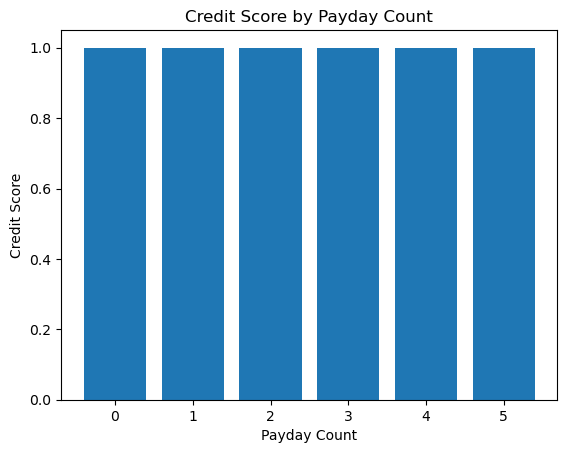

In [26]:
#
df['p_credit_payday'] = np.where((df['Credit_Score'] == 'Poor') & (df['Payday_Count'] >= 0), 1, 0)


import matplotlib.pyplot as plt
#Create a bar graph
plt.bar(df['Payday_Count'], df['p_credit_payday'], label = 'poor')


plt.xlabel('Payday Count')
plt.ylabel('Credit Score')
plt.title('Credit Score by Payday Count')
#plt.legend()
plt.show()

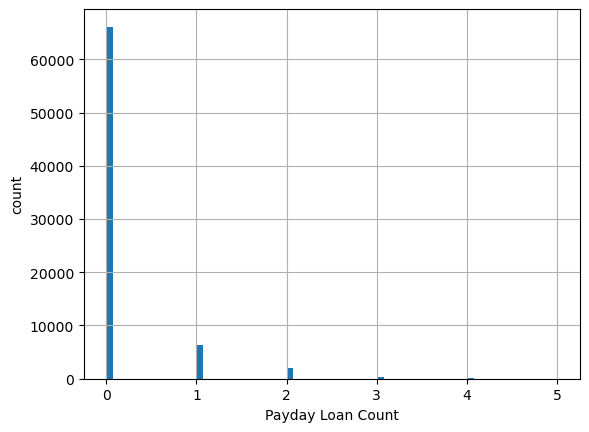

In [43]:
#
df['payday_poor'] = df.apply(lambda x: x['Payday_Count'] if x['Credit_Score'] == 'Poor' else 0, axis = 1)
df.payday_poor.hist(bins=65)
plt.xlabel('Payday Loan Count')
plt.ylabel('count');

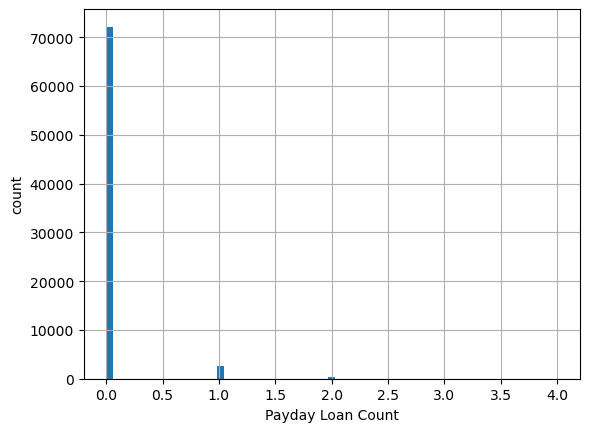

In [38]:
#
df['payday_good'] = df.apply(lambda x: x['Payday_Count'] if x['Credit_Score'] == 'Good' else 0, axis = 1)
df.payday_good.hist(bins=65)
plt.xlabel('Payday Loan Count')
plt.ylabel('count');

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

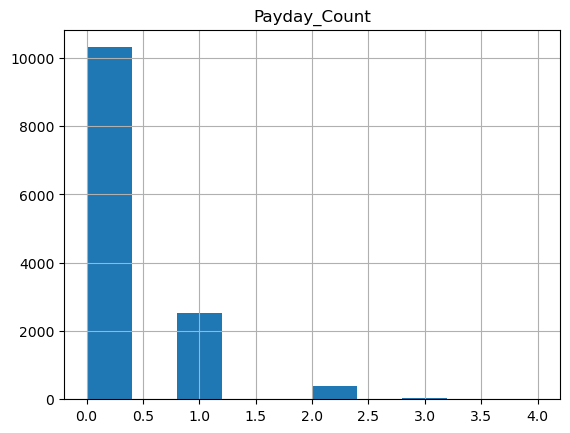

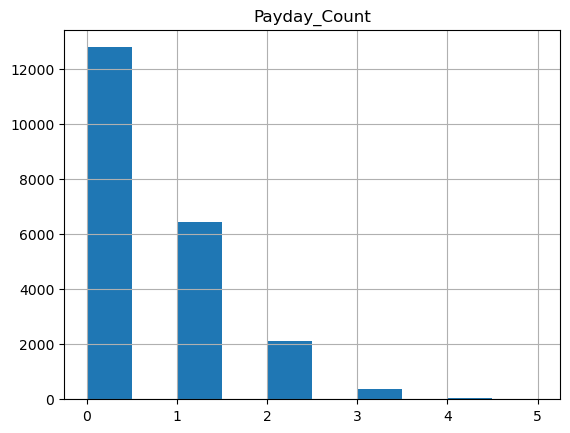

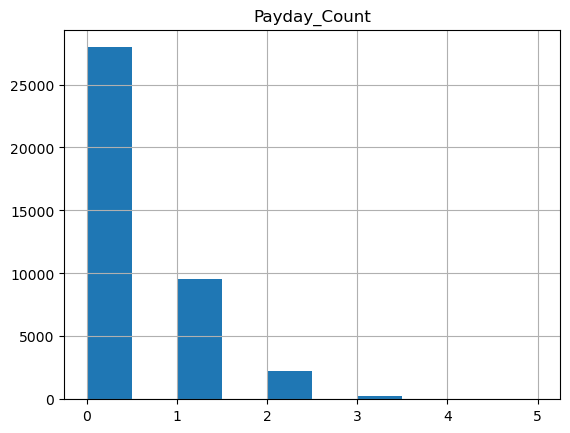

In [41]:
# Plot Payday count grouped by Credit Score
df[['Credit_Score' ,'Payday_Count']].groupby('Credit_Score').hist()

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

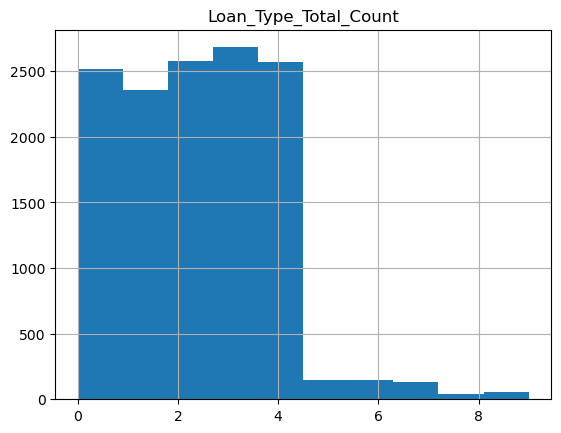

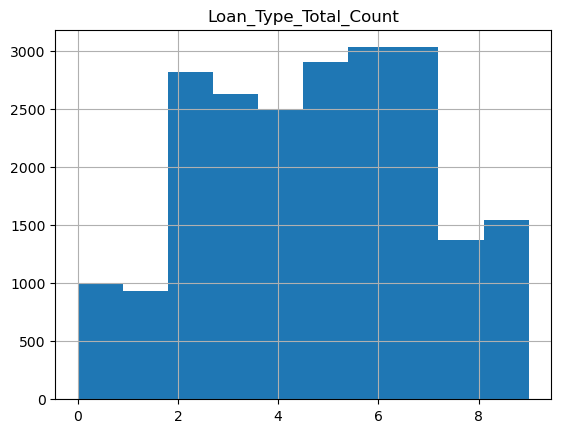

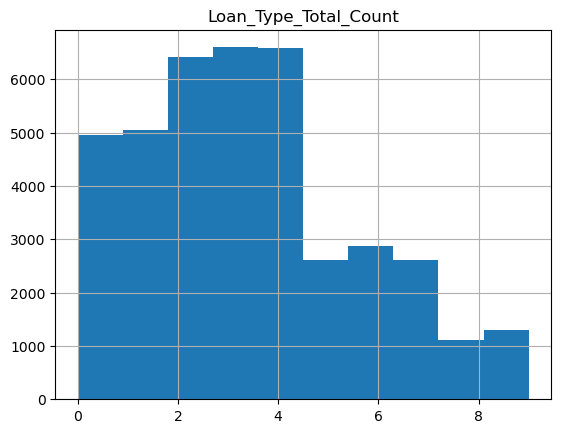

In [42]:
# Plot Payday count grouped by Credit Score
df[['Credit_Score' ,'Loan_Type_Total_Count']].groupby('Credit_Score').hist()

Text(0, 0.5, 'Count')

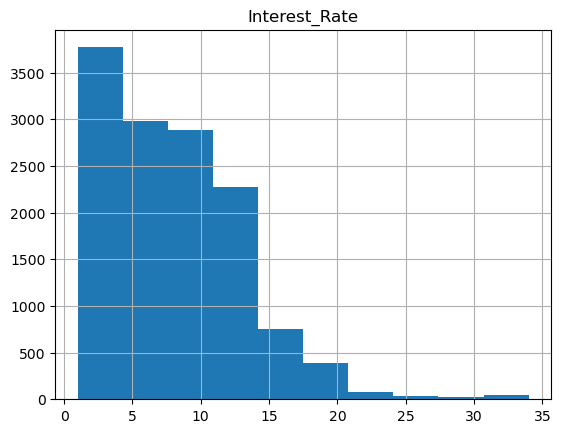

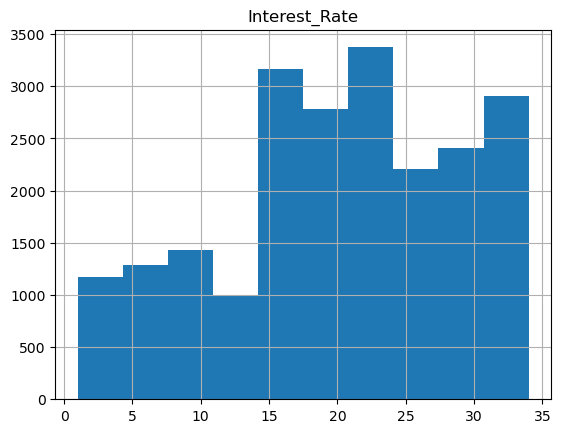

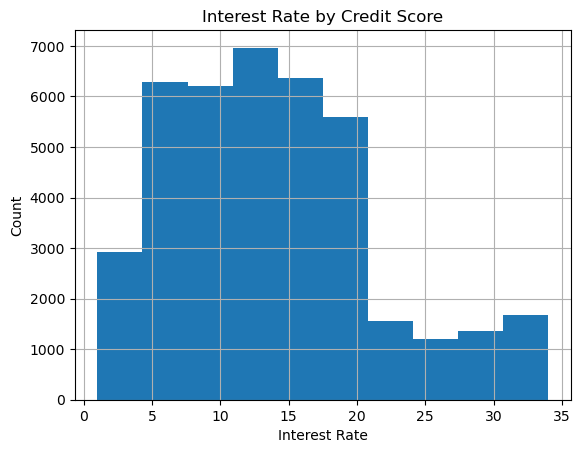

In [54]:
# Plot Interest Rate grouped by Credit Score
df.rename(columns={'fn_IRate': 'Interest_Rate'}, inplace=True)
df[['Credit_Score' ,'Interest_Rate']].groupby('Credit_Score').hist()
plt.title("Interest Rate by Credit Score")
plt.xlabel("Interest Rate")
plt.ylabel("Count")

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

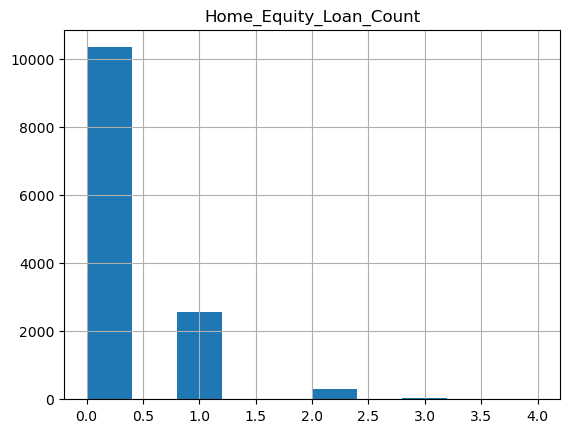

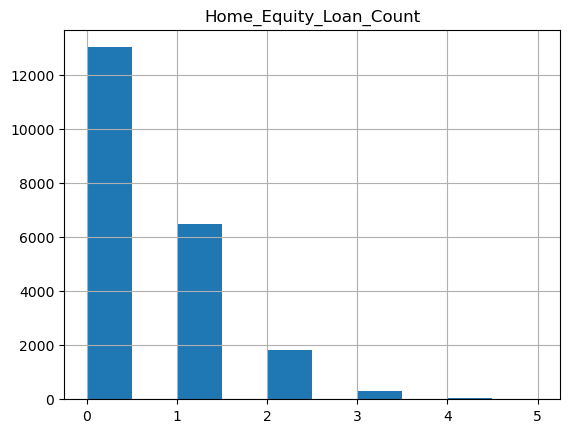

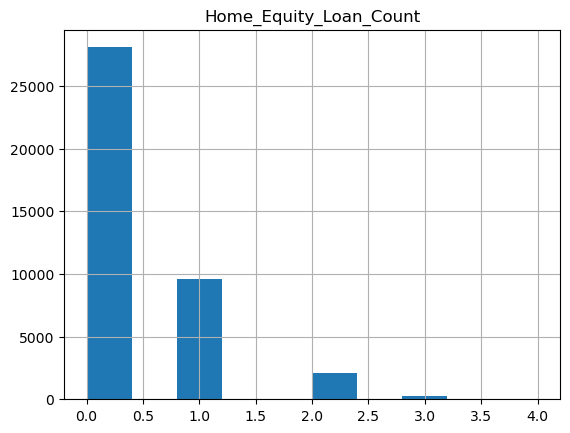

In [49]:
# Plot Home_Equity_Loan_Count grouped by Credit Score
df[['Credit_Score' ,'Home_Equity_Loan_Count']].groupby('Credit_Score').hist()

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

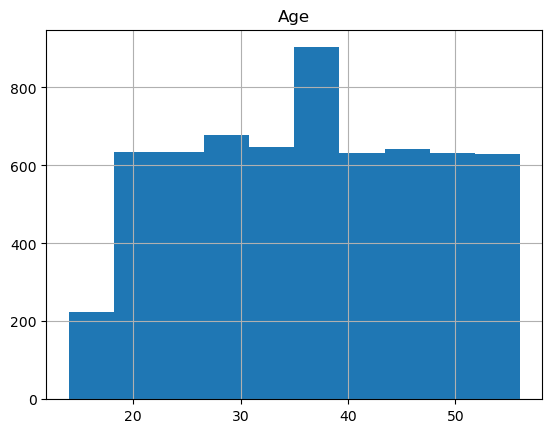

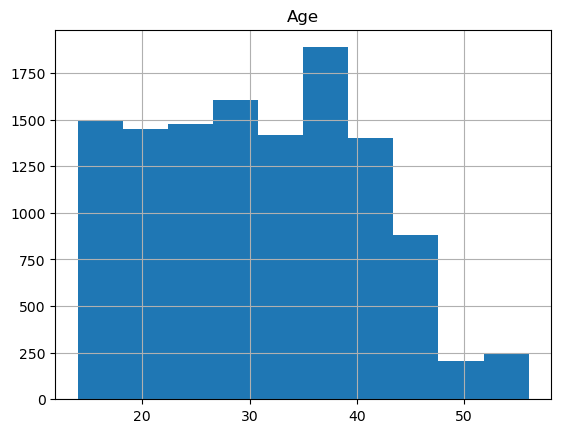

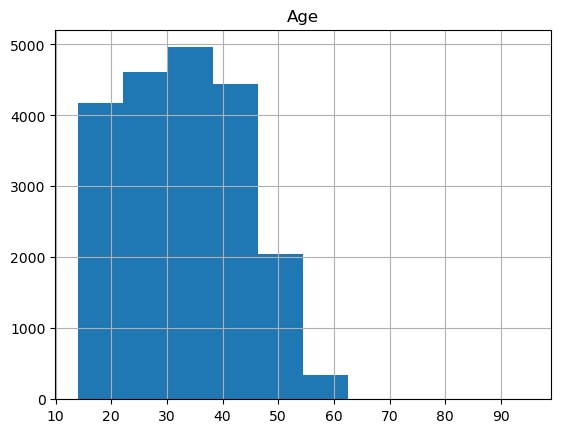

In [52]:
# Plot Age grouped by Credit Score
df[['Credit_Score' ,'Age']].groupby('Credit_Score').hist()

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

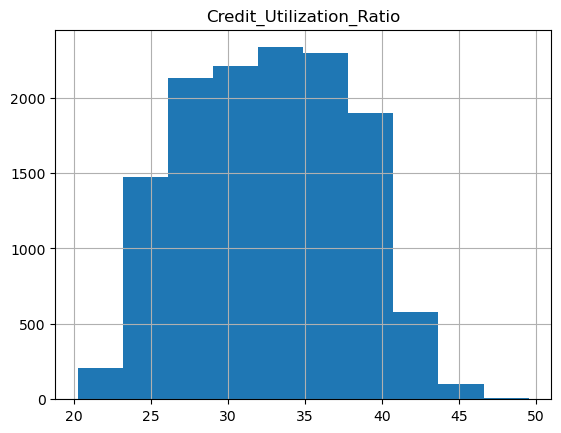

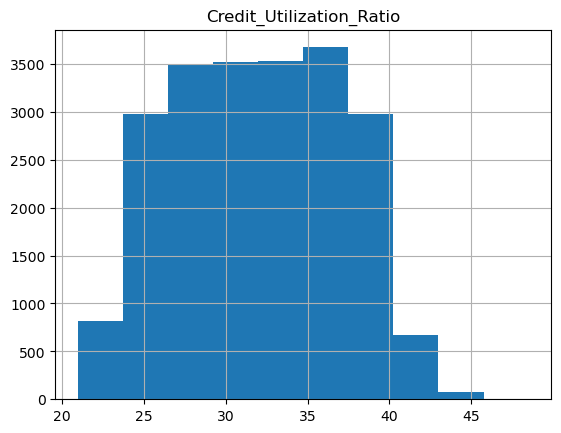

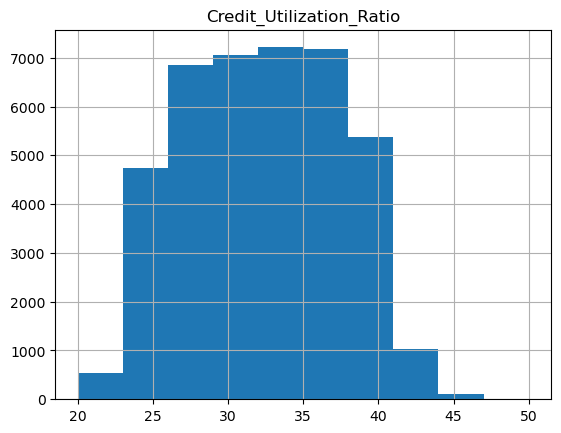

In [51]:
# Plot Age grouped by Credit Score
df[['Credit_Score' ,'Credit_Utilization_Ratio']].groupby('Credit_Score').hist()

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

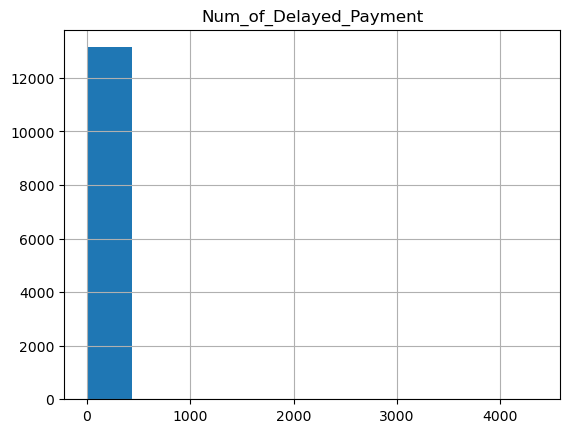

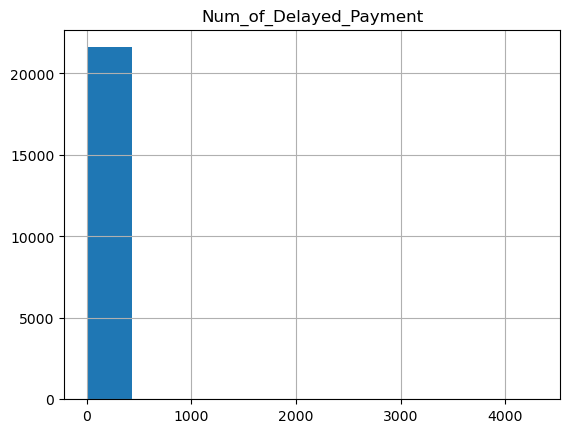

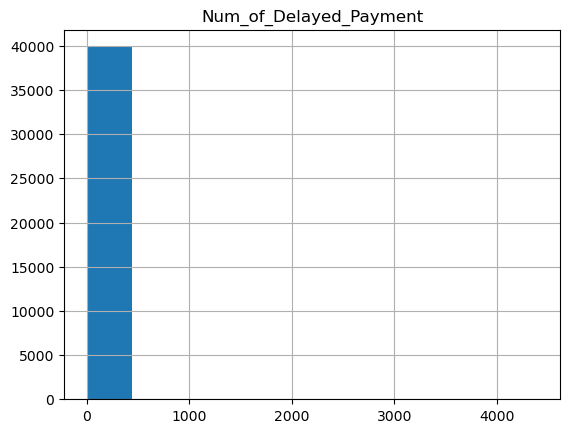

In [52]:
#
# Plot Age grouped by Credit Score
df[['Credit_Score' ,'Num_of_Delayed_Payment']].groupby('Credit_Score').hist()

Credit_Score
Good        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Poor        [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Standard    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

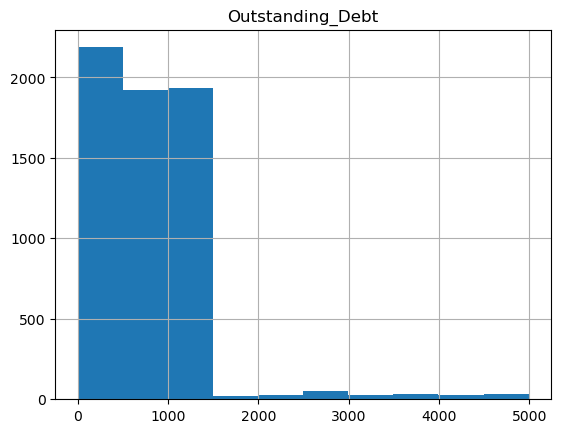

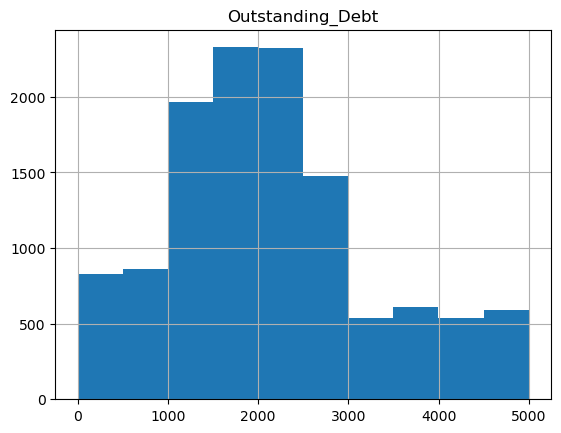

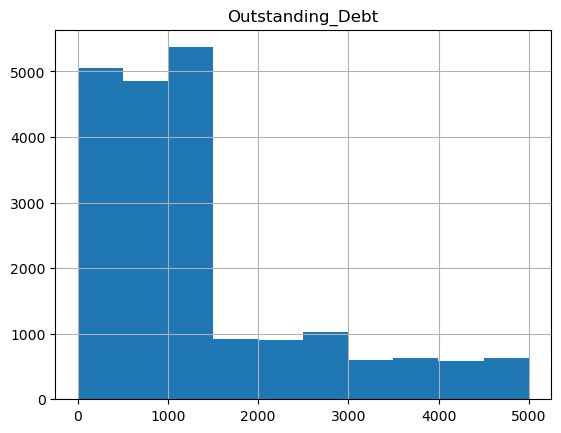

In [54]:
# Plot Age grouped by Credit Score
df[['Credit_Score' ,'Outstanding_Debt']].groupby('Credit_Score').hist()

In [55]:
from sklearn.linear_model import LogisticRegression

# Load data
data = df #pd.read_csv('credit_data.csv')

# Split data into features (X) and labels (y)
X = data[[ 'Credit_Score_Number',  'Interest_Rate']]  #  , 'fn_IRate'
y = data['Credit_Score'] #  'classification'

# Create logistic regression model 
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate accuracy of model
score = model.score(X, y)
print('Model accuracy:', score)
#X = data[[ 'Outstanding_Debt', 'Loan_Type_Total_Count', 'fn_IRate']]
#y = data['Credit_Score']    Model accuracy: 0.5841524814193239
# X = data[[ 'Outstanding_Debt', 'Loan_Type_Total_Count', 'Monthly_Inhand_Salary', 'fn_IRate']]
# y = data['Credit_Score']   Model accuracy: 0.5583526465808892
# X = data[[  'Loan_Type_Total_Count', 'fn_IRate']]
# y = data['Credit_Score']  Model accuracy: 0.5887210634273689
# X = data[[ 'Credit_Score_Number',  'fn_IRate']]  #  , 'fn_IRate'
# y = data['Credit_Score'] #  Model accuracy: 1.0 confirming what I suspected 

              count      mean       std  min  max
Credit_Score                                     
Good           6258  0.290348  0.518699  0.0  3.0
Poor          12066  0.544091  0.738220  0.0  4.0
Standard      20566  0.409705  0.644558  0.0  5.0
